<a href="https://colab.research.google.com/github/danawa3000/CAPSTONE/blob/main/4%EB%B2%88%EC%A7%B8%2C_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt 
# 네이버 나눔 폰트 설치(네이버 나눔폰트 설치 실행 후 런타임 재시작 필수)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic') 
%config InlineBackend.figure_format = 'retina'
#실행후 런타임 재시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [1]:
#라이브러리 호출
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix

In [2]:
#df7 불러오기
df7=pd.read_csv('/content/drive/MyDrive/test/전처리.csv', encoding='euc-kr')

In [3]:
df7.head()

,sex,age,height,weight,smk,drk,prote,waist,bp_high,bp_lwst,blds,tot_chole,triglyceride,hdl_chole,ldl_chole,hmg,creatinine,sgot_ast,sgpt_alt,gamma_gtp,bmi,egfr
0,여자,85세 이상,145~149cm,30~34kg,피우지 않는다,마시지 않는다,-,-1.353882,-0.833293,-0.600104,-1.346497,-1.178767,-0.938286,-1.031234,-0.655184,-3.153017,-0.304837,0.208712,-0.504670,-0.689417,-2.788903,-0.227349
1,여자,20~24세,140~144cm,40~44kg,피우지 않는다,마시지 않는다,-,-0.406396,-1.451081,-1.307460,-0.148516,-0.831155,-0.214381,-0.128239,-0.944642,-1.721593,0.035960,-0.032242,-0.616204,-0.303664,-1.005895,-0.220577
2,여자,20~24세,145~149cm,35~39kg,피우지 않는다,마신다,-,-1.880263,-1.519725,-1.610612,-0.102439,1.040601,0.035241,1.886134,0.028991,-0.788056,-0.304837,-0.835422,-0.783505,-0.689417,-2.098252,0.395102
3,여자,20~24세,145~149cm,40~44kg,피운다,마신다,-,-1.985540,-1.519725,-1.610612,-0.102439,-0.750937,-0.813474,0.983139,-1.049899,-0.788056,-0.134438,-0.594468,-0.671971,-0.659743,-1.407600,0.045846
4,여자,20~24세,150~154cm,40~44kg,피우지 않는다,마시지 않는다,-,-2.301368,0.196355,0.006201,-0.471049,-0.964852,-0.651220,-0.545006,-0.734127,-0.476877,-0.304837,-0.273196,-0.783505,-0.719090,-1.769809,0.395102


In [5]:
df7.shape

(2853545, 22)

In [6]:
df7.dtypes

sex              object
age              object
height           object
weight           object
smk              object
drk              object
prote            object
waist           float64
bp_high         float64
bp_lwst         float64
blds            float64
tot_chole       float64
triglyceride    float64
hdl_chole       float64
ldl_chole       float64
hmg             float64
creatinine      float64
sgot_ast        float64
sgpt_alt        float64
gamma_gtp       float64
bmi             float64
egfr            float64
dtype: object

In [7]:
temp=df7[['sex',	'age',	'height',	'weight',	'smk',	'drk',	'prote']]

In [8]:
temp.head()

,sex,age,height,weight,smk,drk,prote
0,여자,85세 이상,145~149cm,30~34kg,피우지 않는다,마시지 않는다,-
1,여자,20~24세,140~144cm,40~44kg,피우지 않는다,마시지 않는다,-
2,여자,20~24세,145~149cm,35~39kg,피우지 않는다,마신다,-
3,여자,20~24세,145~149cm,40~44kg,피운다,마신다,-
4,여자,20~24세,150~154cm,40~44kg,피우지 않는다,마시지 않는다,-


In [10]:
X = pd.get_dummies(temp)
X.head()

,sex_남자,sex_여자,age_20~24세,age_25~29세,age_30~34세,age_35~39세,age_40~44세,age_45~49세,age_50~54세,age_55~59세,age_60~64세,age_65~69세,age_70~74세,age_75~79세,age_80~84세,age_85세 이상,height_120~124cm,height_125~129cm,height_130~134cm,height_135~139cm,height_140~144cm,height_145~149cm,height_150~154cm,height_155~159cm,height_160~164cm,height_165~169cm,height_170~174cm,height_175~179cm,height_180~184cm,height_185~189cm,height_190~194cm,height_195~199cm,height_200cm 이상,weight_100~104kg,weight_105~109kg,weight_110~114kg,weight_115~119kg,weight_120~124kg,weight_125~129kg,weight_130~134kg,weight_135~139kg,weight_140kg 이상,weight_30~34kg,weight_35~39kg,weight_40~44kg,weight_45~49kg,weight_50~54kg,weight_55~59kg,weight_60~64kg,weight_65~69kg,weight_70~74kg,weight_75~79kg,weight_80~84kg,weight_85~89kg,weight_90~94kg,weight_95~99kg,smk_피우지 않는다,smk_피운다,drk_마시지 않는다,drk_마신다,prote_+1,prote_+2,prote_+3,prote_+4,prote_-,prote_±
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0


In [12]:
Y=df7[['waist',	'bp_high',	'bp_lwst',	'blds',	'tot_chole',	'triglyceride',	'hdl_chole',	'ldl_chole',	'hmg',	'creatinine',	'sgot_ast',	'sgpt_alt',	'gamma_gtp',	'bmi',	'egfr']]
Y.head()

,waist,bp_high,bp_lwst,blds,tot_chole,triglyceride,hdl_chole,ldl_chole,hmg,creatinine,sgot_ast,sgpt_alt,gamma_gtp,bmi,egfr
0,-1.353882,-0.833293,-0.600104,-1.346497,-1.178767,-0.938286,-1.031234,-0.655184,-3.153017,-0.304837,0.208712,-0.504670,-0.689417,-2.788903,-0.227349
1,-0.406396,-1.451081,-1.307460,-0.148516,-0.831155,-0.214381,-0.128239,-0.944642,-1.721593,0.035960,-0.032242,-0.616204,-0.303664,-1.005895,-0.220577
2,-1.880263,-1.519725,-1.610612,-0.102439,1.040601,0.035241,1.886134,0.028991,-0.788056,-0.304837,-0.835422,-0.783505,-0.689417,-2.098252,0.395102
3,-1.985540,-1.519725,-1.610612,-0.102439,-0.750937,-0.813474,0.983139,-1.049899,-0.788056,-0.134438,-0.594468,-0.671971,-0.659743,-1.407600,0.045846
4,-2.301368,0.196355,0.006201,-0.471049,-0.964852,-0.651220,-0.545006,-0.734127,-0.476877,-0.304837,-0.273196,-0.783505,-0.719090,-1.769809,0.395102


In [17]:
X.shape

(2853545, 66)

In [15]:
X_sample = X.sample(frac=0.1, replace=True, random_state=0)
X_sample.shape

(285354, 66)

In [18]:
Y_sample = Y.sample(frac=0.1, replace=True, random_state=0)
Y_sample.shape

(285354, 15)

In [27]:
#데이터나누기
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sample,Y_sample,test_size=0.2, random_state=0)

In [40]:
#모델 구조 만들기
x=tf.keras.layers.Input(shape=[66])
h=tf.keras.layers.Dense(32, activation='softmax')(x)
y=tf.keras.layers.Dense(15, activation='softmax')(h)
model = tf.keras.models.Model(x,y)
model.compile(optimizer='SGD', loss='mse', metrics='accuracy')

In [41]:
#학습
model.fit(X_train,y_train, epochs=10, validation_split=0.2)

Epoch 1/10
5708/5708 [==============================] - 23s 4ms/step - loss: 1.0214 - accuracy: 0.0701 - val_loss: 1.0198 - val_accuracy: 0.0753
Epoch 2/10
5708/5708 [==============================] - 23s 4ms/step - loss: 1.0201 - accuracy: 0.0746 - val_loss: 1.0187 - val_accuracy: 0.0754
Epoch 3/10
5708/5708 [==============================] - 25s 4ms/step - loss: 1.0191 - accuracy: 0.0746 - val_loss: 1.0177 - val_accuracy: 0.0754
Epoch 4/10
5708/5708 [==============================] - 25s 4ms/step - loss: 1.0182 - accuracy: 0.0746 - val_loss: 1.0170 - val_accuracy: 0.0754
Epoch 5/10
5708/5708 [==============================] - 25s 4ms/step - loss: 1.0175 - accuracy: 0.0746 - val_loss: 1.0163 - val_accuracy: 0.0754
Epoch 6/10
5708/5708 [==============================] - 23s 4ms/step - loss: 1.0169 - accuracy: 0.0746 - val_loss: 1.0157 - val_accuracy: 0.0754
Epoch 7/10
5708/5708 [==============================] - 25s 4ms/step - loss: 1.0163 - accuracy: 0.0746 - val_loss: 1.0152 - val_ac

In [55]:
model.evaluate(X_test,y_test)

1784/1784 [==============================] - 5s 3ms/step - loss: 1.0051 - accuracy: 0.0736


[1.0050917863845825, 0.07357501983642578]

In [58]:
model.predict(arr)

ValueError: ignored

In [57]:
arr= X_sample.iloc[1].values

NameError: ignored

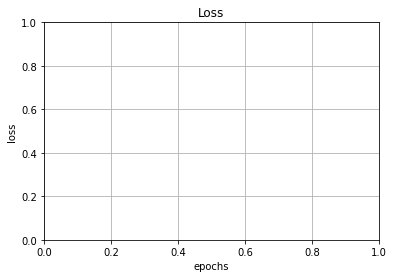

In [48]:
import matplotlib.pyplot as plt 
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.plot(History['loss'],label='train loss')
plt.plot(History['val_loss'],label='validation loss')
plt.legend(loc='best')
plt.show()

In [ ]:
model.get_weights()

In [49]:
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 66)]              0         
                                                                 
 dense_13 (Dense)            (None, 32)                2144      
                                                                 
 dense_14 (Dense)            (None, 15)                495       
                                                                 
Total params: 2,639
Trainable params: 2,639
Non-trainable params: 0
_________________________________________________________________


In [23]:
X_sample.values

array([[1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 1, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [24]:
X_sample.columns

Index(['sex_남자', 'sex_여자', 'age_20~24세', 'age_25~29세', 'age_30~34세',
       'age_35~39세', 'age_40~44세', 'age_45~49세', 'age_50~54세', 'age_55~59세',
       'age_60~64세', 'age_65~69세', 'age_70~74세', 'age_75~79세', 'age_80~84세',
       'age_85세 이상', 'height_120~124cm', 'height_125~129cm',
       'height_130~134cm', 'height_135~139cm', 'height_140~144cm',
       'height_145~149cm', 'height_150~154cm', 'height_155~159cm',
       'height_160~164cm', 'height_165~169cm', 'height_170~174cm',
       'height_175~179cm', 'height_180~184cm', 'height_185~189cm',
       'height_190~194cm', 'height_195~199cm', 'height_200cm 이상',
       'weight_100~104kg', 'weight_105~109kg', 'weight_110~114kg',
       'weight_115~119kg', 'weight_120~124kg', 'weight_125~129kg',
       'weight_130~134kg', 'weight_135~139kg', 'weight_140kg 이상',
       'weight_30~34kg', 'weight_35~39kg', 'weight_40~44kg', 'weight_45~49kg',
       'weight_50~54kg', 'weight_55~59kg', 'weight_60~64kg', 'weight_65~69kg',
       'weight_70~74kg',

In [14]:
#temp['sum']=temp['sex']+'/'+temp['age']+'/'+temp['height']+'/'+temp['weight']+'/'+temp['smk']+'/'+temp['drk']+'/'+temp['prote']
#y=temp['sum']
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
#knn = KNeighborsClassifier(n_neighbors=3)
#svc = SVC(kernel='linear',gamma=10,C=1.0)
#X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)
#model= LogisticRegression()
#model.fit(X_train,y_train)